## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

C:\Users\Max\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


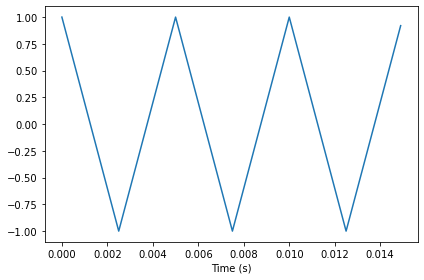

In [2]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [3]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

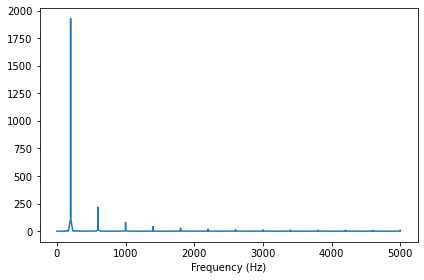

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Make a square signal and plot a 3 period segment.

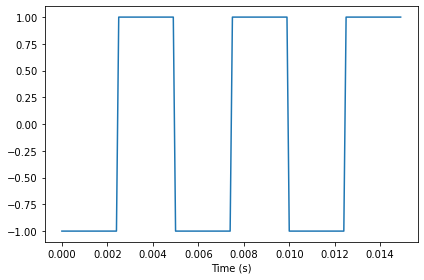

In [6]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [7]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

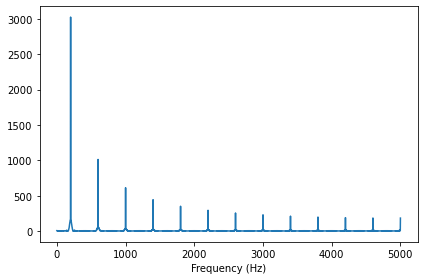

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Create a sawtooth signal and plot a 3 period segment.

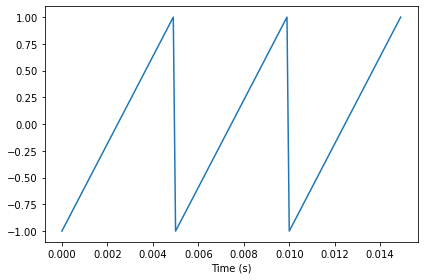

In [9]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [10]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

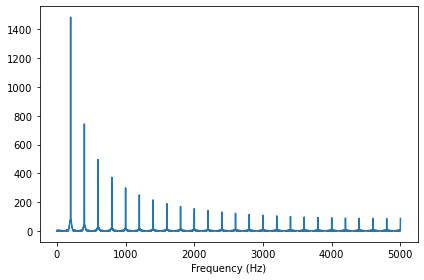

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

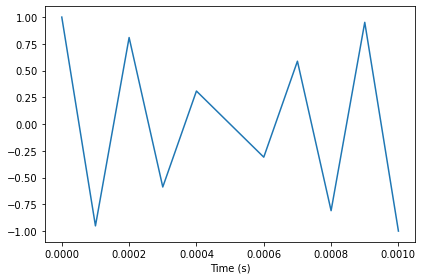

In [12]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

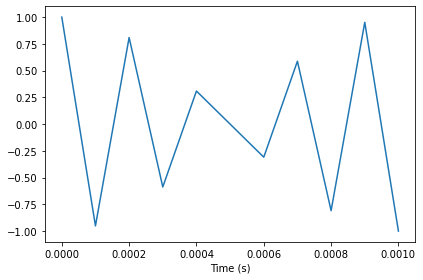

In [13]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

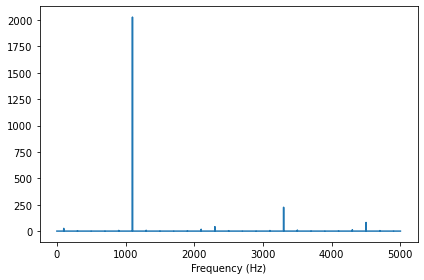

In [14]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

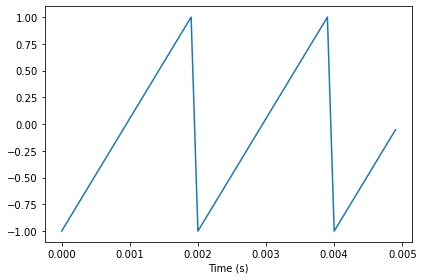

In [15]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [16]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [17]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [18]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

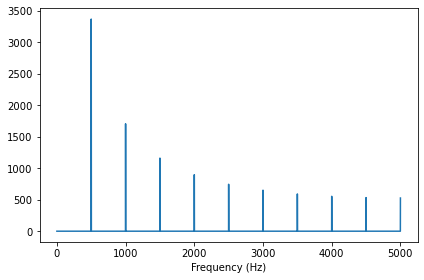

In [20]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

Plot the phases vs the frequencies.

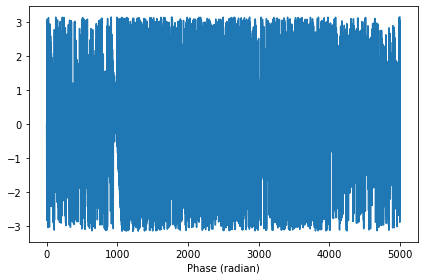

In [21]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

## What does phase sound like?

Shuffle the phases.

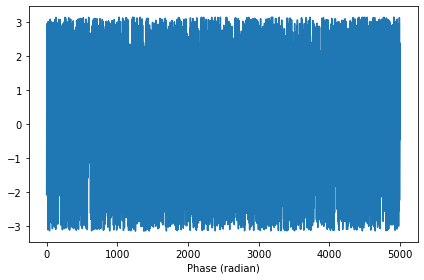

In [22]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [23]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

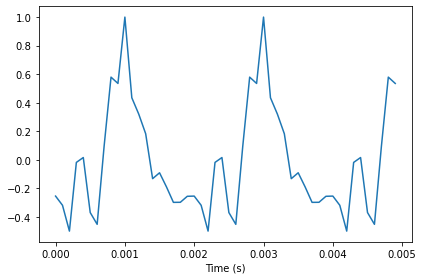

In [24]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play the wave with the shuffled phases.

In [25]:
wave2.make_audio()

For comparison, here's the original wave again.

In [26]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [27]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

In [28]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

# Ex 2.5

In [31]:
def mod_spectrum(spectrum):
    hs = spectrum.hs
    fs = spectrum.fs
    hs[fs == 0] = 0
    fs[fs == 0] = 1
    res = spectrum.copy()
    res.hs = hs/fs
    return res

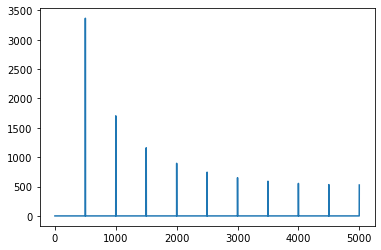

In [32]:
spectrum.plot()

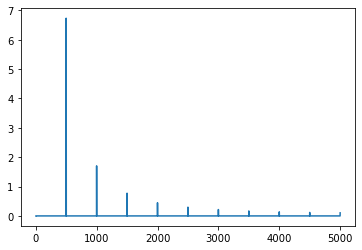

In [33]:
mod_spectrum(spectrum).plot()

In [35]:
spectrum.make_wave().make_audio()

In [36]:
mod_spectrum(spectrum).make_wave().make_audio() # attenua le frequenza alte

# Ex 2.6

In [157]:
from thinkdsp import Signal, Sinusoid


def get_mysignal(freq=440, amp=1.0):
        sinusoids = [Sinusoid(freq=freq*i, amp=amp/(i**2)) for i in range(1,11)]
        s = Sinusoid(freq=440, amp=0.0001)
        for signal in sinusoids:
            s = s + signal
        return s
        
        
#     @property
#     def period(self):
#         """Period of the signal in seconds.

#         returns: float seconds
#         """
#         return 1.0 / self.freq
    
#     def evaluate(self, ts):
#         ts = np.asarray(ts)
#         cycles = ts * self.freq
#         ys = 2*self.amp * ( np.abs(np.modf(cycles)[0]+0.5)  )
#         return ys

def ratio_decay(spectrum):
    print(f'Mean A/f: {np.mean(np.absolute(spectrum.hs[spectrum.fs>0])/spectrum.fs[spectrum.fs>0])}')
    print(f'Mean A/(f**2): {np.mean(np.absolute(spectrum.hs[spectrum.fs>0])/(spectrum.fs[spectrum.fs>0]**2))}')
    
def get_peacks(spectrum, k):
    return list(zip(*sorted(list(zip(spectrum.fs, np.absolute(spectrum.hs))), key = lambda x: -x[1])))[0][:k]

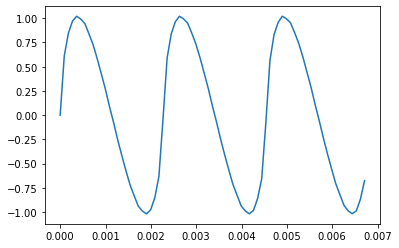

In [158]:
mysignal = get_mysignal()
mysignal.plot()

mywave = mysignal.make_wave()
mywave.unbias()
mywave.normalize()
mywave.apodize()
mywave.make_audio()

Mean A/f: 0.00507977225440082
Mean A/(f**2): 1.2529088009550084e-05
(440.0, 880.0, 1320.0, 1760.0, 441.0)


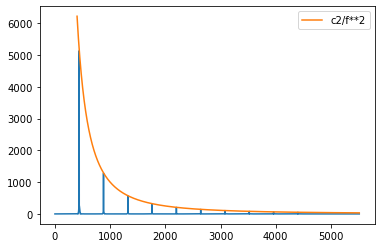

In [161]:
myspectrum = mywave.make_spectrum()
myspectrum.plot()
ratio_decay(myspectrum)
# _=plt.plot(myspectrum.fs[myspectrum.fs>400], 1000000/myspectrum.fs[myspectrum.fs>400], label = 'c1/f')
_=plt.plot(myspectrum.fs[myspectrum.fs>400], 1000000000/(myspectrum.fs[myspectrum.fs>400]**2), label = 'c2/f**2')
_=plt.legend()

print(get_peacks(myspectrum, 5))